In [1]:
import dask.bag as db

In [2]:
bag = db.from_sequence(["mary", "had", "a", "little", "lamb"])

In [3]:
def f(x):
    return x.upper()

bag.map(f).compute()

['MARY', 'HAD', 'A', 'LITTLE', 'LAMB']

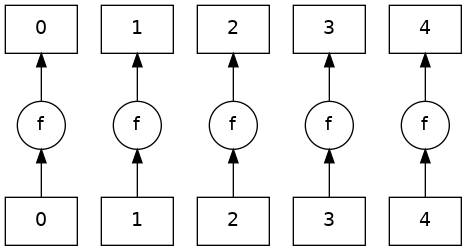

In [4]:
bag.map(f).visualize()

In [9]:
def pred(x):
    return "a" in x

bag.filter(pred).compute()

['mary', 'had', 'a', 'lamb']

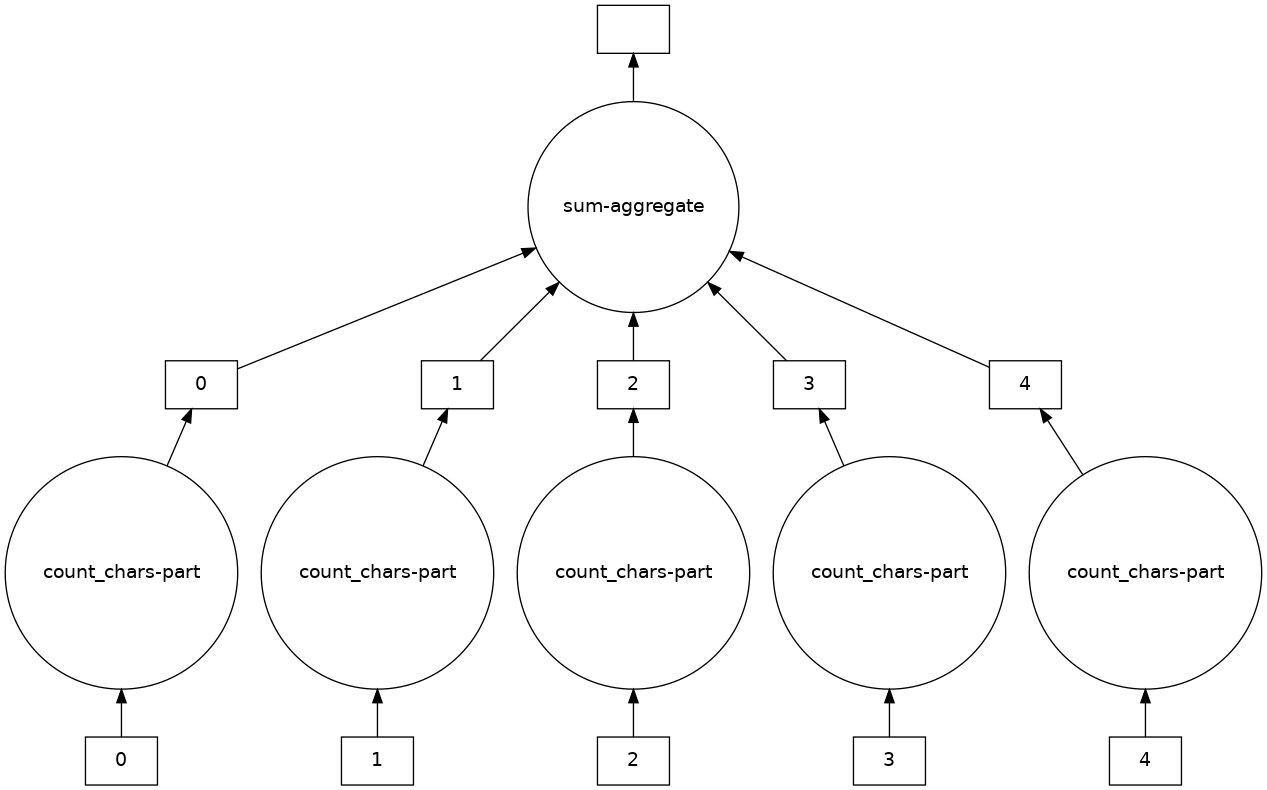

In [8]:
def count_chars(x):
    per_word = [len(w) for w in x]
    return sum(per_word)

bag.reduction(count_chars, sum).visualize()

In [10]:
bag.reduction(count_chars, sum).compute()

18

In [34]:
from nltk.stem.snowball import PorterStemmer
import requests
stemmer = PorterStemmer()

def good_word(w):
    return len(w) > 0 and not any(i.isdigit() for i in w)

def clean_word(w):
    # return w.strip("*!?.:;'\",“’‘”()_").lower()
    return ''.join([i for i in w if i.isalpha()])
                   
def load_url(url):
    response = requests.get(url)
    return response.text    
                   

In [35]:
all_books = [
'https://www.gutenberg.org/files/764/764-0.txt',
'https://www.gutenberg.org/files/15/15-0.txt',
'https://www.gutenberg.org/files/1661/1661-0.txt',
'https://www.gutenberg.org/files/84/84-0.txt',
'https://www.gutenberg.org/files/345/345-0.txt',
'https://www.gutenberg.org/files/768/768-0.txt',
'https://www.gutenberg.org/files/1342/1342-0.txt',
'https://www.gutenberg.org/files/11/11-0.txt',
'https://www.gutenberg.org/files/61262/61262-0.txt'
]

In [36]:
my_url = all_books[0]
my_book = load_url(my_url)

In [37]:
my_bag = db.from_sequence(my_book.split())

In [38]:
my_bag.map(clean_word).filter(good_word).map(stemmer.stem).distinct().count().compute()

7421